In [1]:
from helper.dataset_reader import read_tsv
from comlid_crf import *
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn_crfsuite import metrics

In [2]:
langid = LanguageIdentifier()

In [3]:
## Hyperparameter Optimization
raw_data = read_tsv('../dataset/all-merged-data-140422.tsv')
data = langid.data_transformer(raw_data)
X = [langid.sent2features(s) for s in data]
y = [langid.sent2tags(s) for s in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [4]:
labels = ['ID', 'JV', 'EN', 'O', 'MIX-ID-EN', 'MIX-ID-JV', 'MIX-JV-EN']
c1 = 0.1
c2 = 0.1

In [5]:
model = sklearn_crfsuite.CRF(
    algorithm = 'lbfgs',  # for gradient descent for optimization and getting model parameters
    c1 = c1, # Coefficient for Lasso (L1) regularization
    c2 = c2, # Coefficient for Ridge (L2) regularization
    max_iterations = 100, # The maximum number of iterations for optimization algorithms, iteration for the gradient descent optimization
    all_possible_transitions = True   # Specify whether CRFsuite generates transition features that do not even occur in the training data
)

In [6]:
params_space = {
	'c1': scipy.stats.expon(scale=0.5),
	'c2': scipy.stats.expon(scale=0.05),
}

f1_scorer = make_scorer(metrics.flat_f1_score,
						average='weighted',
						labels=labels)

rs = RandomizedSearchCV(model,
						params_space,  # pass the dictionary of parameters that we need to optimize
						cv=10,  # Determines the cross-validation splitting strategy
						verbose=1,  # Controls the verbosity: the higher, the more messages
						n_jobs=-1,  # Number of jobs to run in parallel, -1 means using all processors
						n_iter=50,  # Number of parameter settings that are sampled
						scoring=f1_scorer)

rs.fit(X_train, y_train)

print('best params:', rs.best_params_)
print('best CV score:', rs.best_score_)
print('model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))
# print("%0.2f f1-score with a standard deviation of %0.2f" % (rs.mean(), rs.std()))

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 23.4min finished


scores: RandomizedSearchCV(cv=10,
                   estimator=CRF(algorithm='lbfgs',
                                 all_possible_transitions=True, c1=0.1, c2=0.1,
                                 keep_tempfiles=None, max_iterations=100),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'c1': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff37f7cc6a0>,
                                        'c2': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff37f7cc970>},
                   scoring=make_scorer(flat_f1_score, average=weighted, labels=['ID', 'JV', 'EN', 'O', 'MIX-ID-EN', 'MIX-ID-JV', 'MIX-JV-EN']),
                   verbose=1)
best params: {'c1': 0.002708624909526817, 'c2': 0.025699602819953583}
best CV score: 0.9453468116673527
model size: 4.33M


AttributeError: 'RandomizedSearchCV' object has no attribute 'mean'

In [18]:
import pandas as pd

df = pd.DataFrame(rs.cv_results_)

In [19]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_c1,param_c2,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,19.691467,1.043443,0.258237,0.015001,0.094097,0.246093,"{'c1': 0.09409721776845667, 'c2': 0.2460929699...",0.941600,0.950776,0.943588,0.941603,0.946544,0.941533,0.945519,0.945609,0.941397,0.944316,0.944248,0.002851,17
1,22.160182,0.542279,0.382311,0.137157,0.182394,0.001534,"{'c1': 0.18239386481927977, 'c2': 0.0015341705...",0.941545,0.947008,0.942702,0.943127,0.945680,0.941394,0.945644,0.946625,0.940838,0.944781,0.943934,0.002175,24
2,21.201193,0.665662,0.274703,0.036577,0.047997,0.007069,"{'c1': 0.04799696841045973, 'c2': 0.0070689875...",0.942996,0.947668,0.942690,0.943294,0.947561,0.941738,0.944867,0.945862,0.940598,0.946292,0.944357,0.002329,13
3,25.595107,2.555844,0.311904,0.069420,0.231562,0.241216,"{'c1': 0.23156181844746607, 'c2': 0.2412159179...",0.941504,0.949655,0.941963,0.942316,0.945213,0.941405,0.944493,0.944807,0.939751,0.943509,0.943462,0.002640,28
4,21.102826,0.899460,0.232290,0.018877,0.486959,0.019119,"{'c1': 0.48695887503616236, 'c2': 0.0191189193...",0.942267,0.947448,0.940581,0.941191,0.943223,0.941174,0.942695,0.945186,0.939471,0.943518,0.942675,0.002222,34
5,19.986466,1.120675,0.244193,0.034765,0.503328,0.016271,"{'c1': 0.5033276975947486, 'c2': 0.01627083838...",0.941570,0.946767,0.940344,0.940857,0.942983,0.940855,0.942463,0.944494,0.938703,0.943637,0.942267,0.002202,35
6,19.201512,0.554175,0.234473,0.020528,0.795325,0.032048,"{'c1': 0.7953245671254751, 'c2': 0.03204848354...",0.939332,0.945848,0.938234,0.939457,0.939958,0.937788,0.940426,0.943467,0.935208,0.940384,0.940010,0.002798,40
7,19.516413,0.293500,0.239588,0.030790,0.083533,0.034259,"{'c1': 0.08353304853048042, 'c2': 0.0342587348...",0.942784,0.949005,0.942945,0.942383,0.947020,0.941852,0.945928,0.947082,0.942060,0.944779,0.944584,0.002412,8
8,19.734770,0.355402,0.226220,0.010332,0.252802,0.00705,"{'c1': 0.25280223381324146, 'c2': 0.0070499557...",0.943187,0.946791,0.941676,0.942786,0.945343,0.942036,0.944543,0.946072,0.941416,0.944996,0.943885,0.001820,26
9,19.591935,0.558534,0.235621,0.021522,0.255441,0.066108,"{'c1': 0.25544135571408183, 'c2': 0.0661083297...",0.943042,0.949449,0.943626,0.941839,0.944225,0.941928,0.944431,0.946263,0.940750,0.945457,0.944101,0.002401,21


In [20]:
df.to_excel('cv_results.xlsx')

In [7]:
c1 = rs.best_params_['c1']
c2 = rs.best_params_['c2']
model = sklearn_crfsuite.CRF(
	algorithm='lbfgs',
	max_iterations=100,
	all_possible_transitions=True,
	c1=c1,
	c2=c2,
)

In [8]:
model

CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.002708624909526817,
    c2=0.025699602819953583, keep_tempfiles=None, max_iterations=100)

In [22]:
# train CRF
%time
model.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.002708624909526817,
    c2=0.025699602819953583, keep_tempfiles=None, max_iterations=100)

In [25]:
y_pred = model.predict(X_test)


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.95      0.98      0.96     22315
          JV       0.91      0.91      0.91      4911
          EN       0.93      0.93      0.93      5006
           O       0.97      0.92      0.94     10167
   MIX-ID-EN       0.96      0.90      0.93       975
   MIX-ID-JV       0.96      0.89      0.92       289
   MIX-JV-EN       0.94      0.86      0.90       274

    accuracy                           0.95     43937
   macro avg       0.95      0.91      0.93     43937
weighted avg       0.95      0.95      0.95     43937



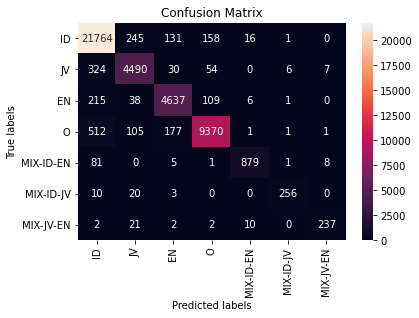

In [26]:
print('\n Evaluation on the test data')
langid.show_confusion_matrix(y_test, y_pred)


 Evaluation on the train data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.99      0.99      0.99     45367
          JV       0.98      0.98      0.98      9705
          EN       0.99      0.99      0.99     11076
           O       1.00      0.99      0.99     20562
   MIX-ID-EN       1.00      0.99      0.99      2001
   MIX-ID-JV       1.00      1.00      1.00       627
   MIX-JV-EN       0.98      0.99      0.98       515

    accuracy                           0.99     89853
   macro avg       0.99      0.99      0.99     89853
weighted avg       0.99      0.99      0.99     89853



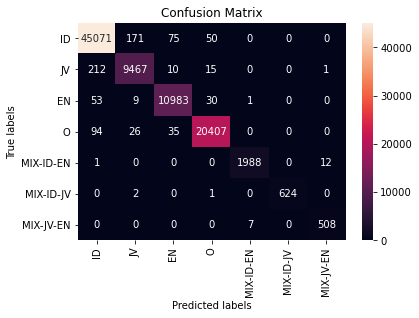

In [31]:
y_pred_train = model.predict(X_train)
print('\n Evaluation on the train data')
langid.show_confusion_matrix(y_train, y_pred_train)

In [32]:
print("\nTop likely transitions:")
langid.print_transitions(Counter(model.transition_features_).most_common(20))
print("\nTop unlikely transitions:")
langid.print_transitions(Counter(model.transition_features_).most_common()[-20:])

# check the state features
print("\nTop positive:")
langid.print_state_features(Counter(model.state_features_).most_common(20))
print("\nTop negative:")
langid.print_state_features(Counter(model.state_features_).most_common()[-20:])


Top likely transitions:
JV         -> JV         1.31081
JV         -> O          1.07246
O          -> O          0.97352
O          -> JV         0.88032
O          -> ID         0.74459
ID         -> O          0.68854
EN         -> O          0.61546
EN         -> EN         0.58788
O          -> EN         0.35536
ID         -> ID         0.32995
JV         -> ID         0.06234
JV         -> EN         0.04601
JV         -> MIX-ID-JV  0.03510
ID         -> JV         0.02575
MIX-JV-EN  -> JV         -0.02017
ID         -> EN         -0.02892
EN         -> ID         -0.09598
MIX-ID-JV  -> JV         -0.09628
MIX-JV-EN  -> O          -0.10723
EN         -> JV         -0.14662

Top unlikely transitions:
ID         -> MIX-ID-JV  -0.62408
MIX-JV-EN  -> EN         -0.66924
MIX-ID-JV  -> ID         -0.68005
EN         -> MIX-JV-EN  -0.75580
MIX-ID-EN  -> MIX-ID-EN  -0.82261
MIX-ID-JV  -> MIX-JV-EN  -0.85393
O          -> MIX-JV-EN  -0.94473
MIX-ID-JV  -> EN         -1.07850
MIX-JV-EN 

In [34]:
import eli5

eli5.show_weights(model, horizontal_layout=False)

In [36]:
# save model
model_name = 'crf_model.pkl'
root_path = '../model/'
joined_path = os.path.join(root_path, model_name)
pickle.dump(model, open(joined_path, 'wb'))